In [1]:
# I'll start by importing the packages i'll need for this project.

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


#Let's Read in the Data
df = pd.read_csv(r'C:\Users\DELL\Downloads\movies.csv')


In [2]:
# # Let us now examine the data.
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [3]:
#I need to check to see if we have any missing data; I'll loop through the data and see if anything is missing.

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0.0%
rating - 1.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 28.0%
gross - 2.0%
company - 0.0%
runtime - 0.0%


In [4]:
#It appears that we have some nulls, which must be corrected.

df = df.dropna()


In [5]:
df = df.fillna(0)

In [6]:
# Now let's look at the Data Types for the columns.

print(df.dtypes)

name         object
rating       object
genre        object
year         object
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [7]:
# I will change the data type for budget and gross column

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')



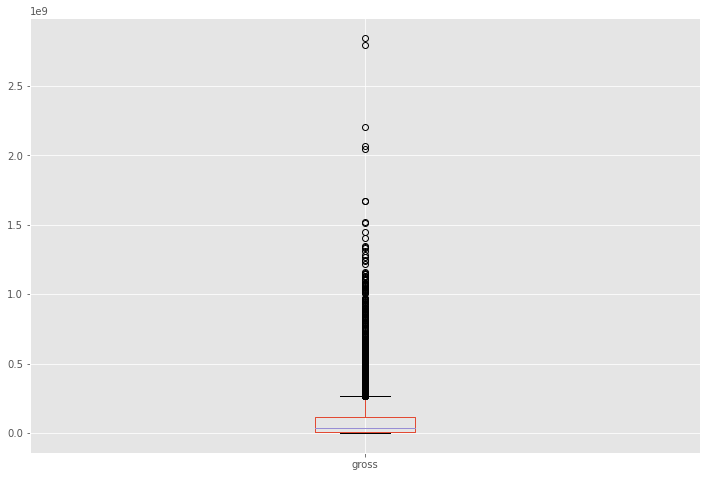

In [11]:
# Are there any Outliers?

df.boxplot(column=['gross'])

In [12]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0


In [13]:
# I'll order the data a little to see what happens in the gross column

df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2015,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0
2434,Philadelphia Experiment II,PG-13,Action,1994,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0
3681,Ginger Snaps,Not Rated,Drama,2001,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0


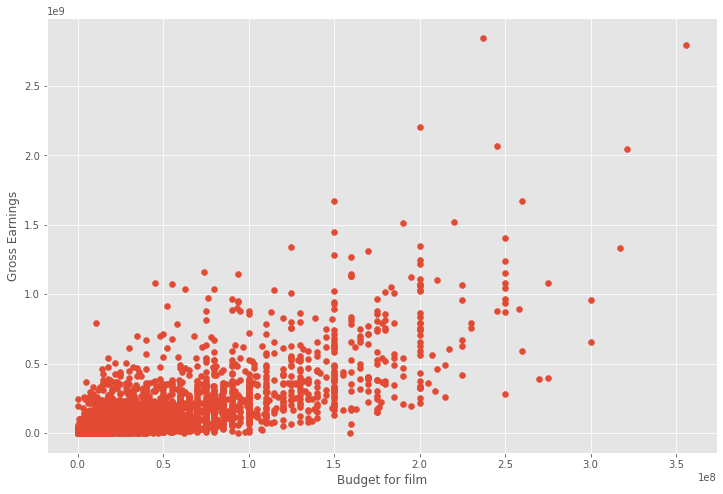

In [14]:
#Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.xlabel('Budget for film')

plt.ylabel('Gross Earnings')

plt.show()

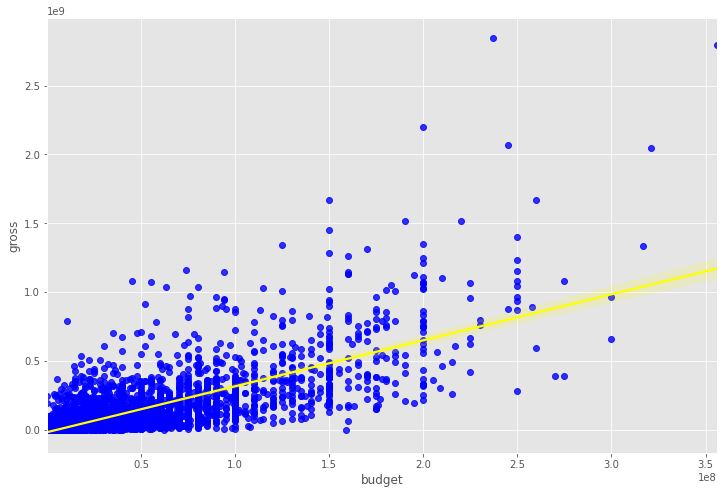

In [17]:
 #Plot Budget vs Gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "blue"}, line_kws={"color": "yellow"})

In [18]:
# I'll start looking at Correlation 

df.corr()

,score,votes,budget,gross,runtime
score,1.000000,0.474485,0.072208,0.222715,0.414524
votes,0.474485,1.000000,0.439594,0.614705,0.352240
budget,0.072208,0.439594,1.000000,0.740218,0.318568
gross,0.222715,0.614705,0.740218,1.000000,0.275723
runtime,0.414524,0.352240,0.318568,0.275723,1.000000


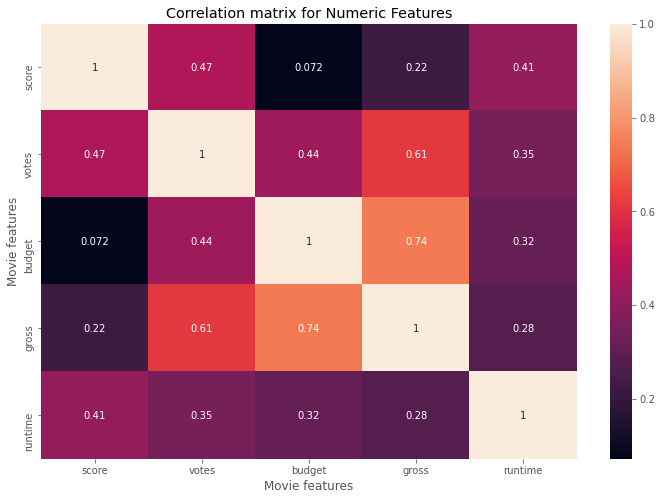

In [19]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [20]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.169975,0.027892,0.935536,0.966065,-0.020482,0.297054,0.725361,0.791788,0.695023,0.098705,0.288994,0.967908,0.535504,0.048902
rating,0.169975,1.000000,-0.116261,0.172374,0.171199,0.036500,0.097439,0.095953,0.128944,0.115629,-0.006148,0.203281,0.172881,-0.026391,0.032334
genre,0.027892,-0.116261,1.000000,0.031431,0.030724,-0.027910,-0.010316,0.036419,0.033581,0.045200,-0.002375,0.021029,0.031502,0.014969,-0.000042
year,0.935536,0.172374,0.031431,1.000000,0.965243,-0.014267,0.310166,0.726940,0.789543,0.701473,0.099636,0.307711,0.964890,0.518607,0.054060
released,0.966065,0.171199,0.030724,0.965243,1.000000,-0.019893,0.312995,0.750784,0.809764,0.719978,0.097374,0.309626,0.998490,0.546181,0.049565
score,-0.020482,0.036500,-0.027910,-0.014267,-0.019893,1.000000,-0.042018,-0.006792,-0.021840,0.014936,0.017784,-0.005280,-0.016151,-0.008632,0.011752
votes,0.297054,0.097439,-0.010316,0.310166,0.312995,-0.042018,1.000000,0.187599,0.224693,0.181756,-0.021563,0.359066,0.306993,0.007311,0.126505
director,0.725361,0.095953,0.036419,0.726940,0.750784,-0.006792,0.187599,1.000000,0.717932,0.636608,0.095589,0.123884,0.751701,0.483801,-0.026971
writer,0.791788,0.128944,0.033581,0.789543,0.809764,-0.021840,0.224693,0.717932,1.000000,0.626518,0.099135,0.208002,0.811282,0.477539,0.023052
star,0.695023,0.115629,0.045200,0.701473,0.719978,0.014936,0.181756,0.636608,0.626518,1.000000,0.098117,0.137851,0.720720,0.442291,0.033261


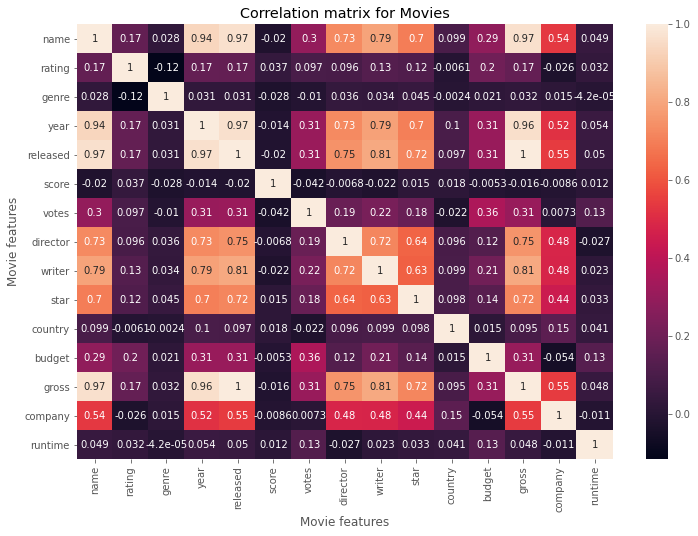

In [21]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [22]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name     name        1.000000
         rating      0.169975
         genre       0.027892
         year        0.935536
         released    0.966065
                       ...   
runtime  country     0.041101
         budget      0.134958
         gross       0.047648
         company    -0.010727
         runtime     1.000000
Length: 225, dtype: float64


In [23]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

genre    rating    -0.116261
rating   genre     -0.116261
budget   company   -0.053717
company  budget    -0.053717
score    votes     -0.042018
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64


In [24]:
# I can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

year     company    0.518607
company  year       0.518607
name     company    0.535504
company  name       0.535504
gross    company    0.546068
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 65, dtype: float64


In [25]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 54610959970
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19612851164
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

In [26]:
df.groupby(['company', 'year'])[["gross"]].sum()

gross
company                             year           
"DIA" Productions GmbH & Co. KG     2003   44350926
"Weathering With You" Film Partners 2020  193457467
.406 Production                     1997      10580
1492 Pictures                       1996  129832389
                                    1999   87423861
...                                             ...
erbp                                2013     587174
i am OTHER                          2015   17986781
i5 Films                            2001   10031529
micro_scope                         2011    7099598
thefyzz                             2017   62198461

[3001 rows x 1 columns]

In [27]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2011    3168551343
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2019    2932757449
                       2006    2918469353
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
                       2005    2773019821
                       2007    2758633559
Name: gross, dtype: int64

In [28]:
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 54610959970
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19612851164
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

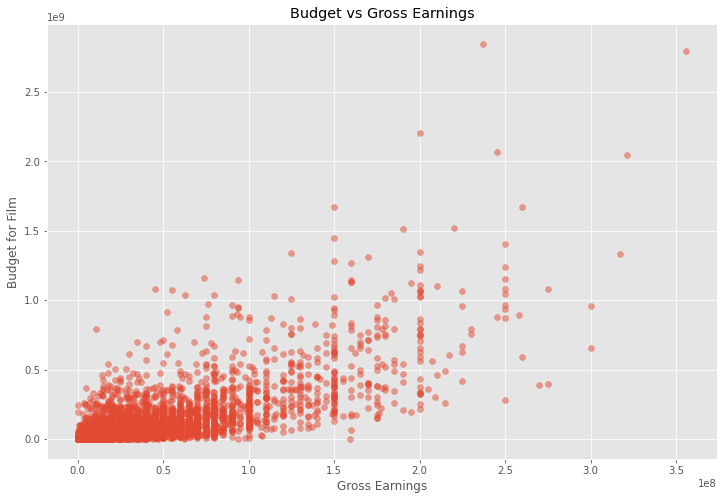

In [30]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()


In [39]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4691,6,6,2,1302,8.4,927000.0,1793,2830,698,46,19000000,46998772,1424,146.0
1,3928,6,1,2,1125,5.8,65000.0,1576,1157,213,47,4500000,58853106,451,104.0
2,3640,4,0,2,1357,8.7,1200000.0,756,1817,1156,47,18000000,538375067,943,124.0
3,204,4,4,2,1125,7.7,221000.0,887,1412,1473,47,3500000,83453539,1106,88.0
4,732,6,4,2,1168,7.3,108000.0,718,350,270,47,6000000,39846344,1081,98.0


In [32]:
df_numerized.corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.030162,0.010886,0.027075,-0.005970,0.014063,0.012680,0.015257,0.013409,-0.006269,-0.024895,0.023546,0.005697,0.021692,0.011183
rating,-0.030162,1.000000,0.147655,0.020458,0.018602,0.065290,0.006198,0.014731,-0.002165,0.010345,0.009422,-0.203809,-0.181912,-0.092471,0.141581
genre,0.010886,0.147655,1.000000,-0.067160,0.022810,0.034920,-0.135798,-0.008319,0.017820,0.003438,-0.008826,-0.368370,-0.243954,-0.071025,-0.059014
year,0.027075,0.020458,-0.067160,1.000000,-0.010327,0.061588,0.202651,-0.035709,-0.022632,-0.031881,-0.072506,0.319978,0.268180,-0.017002,0.075735
released,-0.005970,0.018602,0.022810,-0.010327,1.000000,0.046243,0.028467,0.001935,0.007665,0.015566,-0.017825,0.019529,0.008157,-0.003044,0.008573
score,0.014063,0.065290,0.034920,0.061588,0.046243,1.000000,0.474485,0.005500,0.013310,0.007793,-0.042515,0.072208,0.222715,0.020750,0.414524
votes,0.012680,0.006198,-0.135798,0.202651,0.028467,0.474485,1.000000,-0.010495,-0.005450,-0.017691,0.041377,0.439594,0.614705,0.118300,0.352240
director,0.015257,0.014731,-0.008319,-0.035709,0.001935,0.005500,-0.010495,1.000000,0.261765,0.036625,0.010985,-0.009786,-0.029681,-0.008486,0.017332
writer,0.013409,-0.002165,0.017820,-0.022632,0.007665,0.013310,-0.005450,0.261765,1.000000,0.017884,0.021774,-0.039713,-0.036022,-0.003788,-0.017987
star,-0.006269,0.010345,0.003438,-0.031881,0.015566,0.007793,-0.017691,0.036625,0.017884,1.000000,-0.010756,-0.021640,-0.000053,0.014178,0.009714


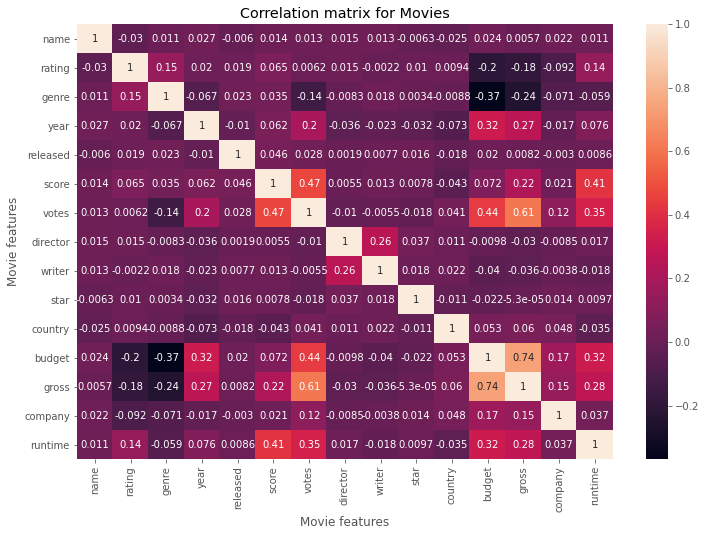

In [33]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()